In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import urllib.request 
url = 'https://raw.githubusercontent.com/HIPS/neural-fingerprint/master/data/2015-05-24-delaney/ci034243xsi20040112_053635.txt'
urllib.request.urlretrieve(url, 'water_solubility.txt') 
df = pd.read_csv('water_solubility.txt', sep=',') 
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')
df.columns = ['ID', 'm_sol', 'p_sol', 'SMILES', 'ROMol']



In [2]:
mols = [Chem.MolFromSmiles(i) for i in df['SMILES']]

maccskeys = []
for m in mols:
    maccskey = [x for x in AllChem.GetMACCSKeysFingerprint(m)]
    maccskeys.append(maccskey)
X = np.array(maccskeys)
y = df['m_sol']

In [3]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
regr = RandomForestRegressor(n_estimators=100,random_state=0)
regr.fit(X, y)
mean_absolute_error(regr.predict(X),y)



0.3694205637413728

In [28]:
def logp_calc(x):
    return regr.predict(x)

In [5]:


from numpy.random import randint
from numpy.random import rand



In [62]:
rand()

0.9749296772323556

In [63]:
np.random.seed(233)
def mutation(pop,r_mut):
    for i in range(len(pop)):
        if rand() > r_mut:
            pop[i] = randint(0,2)
    return pop


In [74]:
xcan = []
for i in range(10000):
    np.random.seed(i)
    xcan.append([random.randint(0, 1) for p in range(167)])
xcan = np.array(xcan)
xcan.shape    

(10000, 167)

In [77]:
import random

In [208]:
class simulator(object):
    def __init__(self, x):
        self.t = -logp_calc(x)

    def __call__( self, action):
        return self.t[action]

In [217]:
import physbo
simu = simulator(xcan)

policy = physbo.search.discrete.policy(test_X=xcan)
policy.set_seed(0)

In [218]:
res = policy.random_search(max_num_probes=5, simulator=simulator(xcan))

0001-th step: f(x) = 2.307077 (action=9394)
   current best f(x) = 2.307077 (best action=9394) 

0002-th step: f(x) = 4.045877 (action=3583)
   current best f(x) = 4.045877 (best action=3583) 

0003-th step: f(x) = 4.644623 (action=4358)
   current best f(x) = 4.644623 (best action=4358) 

0004-th step: f(x) = 3.634893 (action=2991)
   current best f(x) = 4.644623 (best action=4358) 

0005-th step: f(x) = 3.951923 (action=2323)
   current best f(x) = 4.644623 (best action=4358) 



In [219]:
res_TS = policy.bayes_search(max_num_probes=5, 
                             simulator=simulator(xcan), score='TS',
                             interval=10, 
                             num_rand_basis=5000)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 5.973744255704563
50 -th epoch marginal likelihood 5.911119598787423
100 -th epoch marginal likelihood 5.871459819719742
150 -th epoch marginal likelihood 5.849656932241771
200 -th epoch marginal likelihood 5.839271121890324
250 -th epoch marginal likelihood 5.835026566315912
300 -th epoch marginal likelihood 5.833545510633604
350 -th epoch marginal likelihood 5.8331046241982785
400 -th epoch marginal likelihood 5.832992540391977
450 -th epoch marginal likelihood 5.832968185802832
500 -th epoch marginal likelihood 5.832963664575456
Done

0006-th step: f(x) = 2.975433 (action=2265)
   current best f(x) = 4.644623 (best action=4358) 

0007-th step: f(x) = 3.807606 (action=5403)
   current best f(x) = 4.644623 (best action=4358) 

0008-th step: f(x) = 3.615812 (action=4499)
   current best f(x) = 4.644623 (best action=4358) 

0009-th step: f(x) = 4.328649 (action=42

In [202]:
res_TS.chosen_actions[:40]

array([9394, 3583, 4358, 2991, 2323, 4050, 3708,  505, 5163, 9198, 1304,
       2988, 8424, 5710, 3382, 1634, 7774, 3007, 3087,  869, 8709, 1414,
       9267, 1811, 3006, 2743, 4555, 5780, 9022, 8628, 2115, 9388,  387,
       3516, 4440, 3601, 2380, 7514,  876,  918])

In [206]:
logp_calc(xcan[918].reshape(1, -1))

array([-3.40654908])

In [174]:
res_TS.export_sequence_best_fx()

(array([-2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667]),
 array([9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394,
        9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394,
        9394, 9394, 9394]))

In [175]:
res_TS.export_all_sequence_best_fx()

(array([-2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667]),
 array([9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394,
        9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394,
        9394, 9394, 9394]))

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
res.total_num_search

20

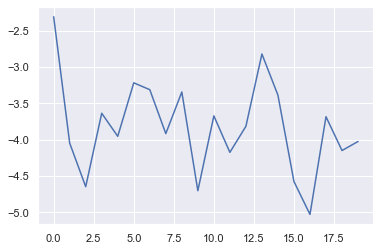

In [142]:
plt.plot(res.fx[0:res.total_num_search])

In [160]:
res.export_sequence_best_fx()[0]

20

In [163]:
res.export_sequence_best_fx()

(array([-2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667,
        -2.30707667, -2.30707667, -2.30707667, -2.30707667, -2.30707667]),
 array([9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394,
        9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394, 9394]))

In [171]:
res = physbo.search.discrete.results.history()

In [173]:
res

TypeError: 'history' object is not callable